<a href="https://colab.research.google.com/github/mnocerino23/NBA-Player-Classifier/blob/main/NBA_classifiers_3classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
nba_train = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/NBA/nba_train.csv')
nba_test = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/NBA/nba_test.csv')

In [29]:
nba_train.shape

(314, 52)

In [30]:
nba_test.shape

(79, 52)

# Grouping Players into classes based on their salary


1.   Low Level Player (Earn below 6 million)
2.   Average Player (Earn 6-12 million)
3.   Quality Player (Earn 12-20 million)
4.   Max Player (Earn 20+ million)




In [31]:
nba_train['class'] = ''
for index, row in nba_train.iterrows():
  if nba_train.at[index,'Salary'] <= 9:
    nba_train.at[index,'class'] = 'Average Player'
  elif nba_train.at[index,'Salary'] > 9 and nba_train.at[index,'Salary'] <= 20:
    nba_train.at[index,'class'] = 'Quality Player'
  elif nba_train.at[index,'Salary']> 20:
    nba_train.at[index,'class'] = 'Max Player'

In [32]:
print(nba_train['class'].value_counts())

Average Player    202
Quality Player     68
Max Player         44
Name: class, dtype: int64


In [33]:
nba_test['class'] = ''
for index, row in nba_test.iterrows():
  if nba_test.at[index,'Salary'] <= 9:
    nba_test.at[index,'class'] = 'Average Player'
  elif nba_test.at[index, 'Salary'] > 9 and nba_test.at[index,'Salary'] <= 20:
    nba_test.at[index,'class'] = 'Quality Player'
  elif nba_test.at[index,'Salary'] > 20:
    nba_test.at[index,'class'] = 'Max Player'

In [34]:
print(nba_test['class'].value_counts())

Average Player    46
Quality Player    17
Max Player        16
Name: class, dtype: int64


In [35]:
nba_train = nba_train.drop(['Salary'], axis = 1)
nba_test = nba_test.drop(['Salary'], axis = 1)

In [36]:
nba_train_features = nba_train.drop(['class'], axis = 1)
nba_train_target = nba_train['class']

nba_test_features = nba_test.drop(['class'], axis = 1)
nba_test_target = nba_test['class']

In [37]:
print('Train:')
print('train_features dimensions: ', nba_train_features.shape)
print('train_target dimensions: ', nba_train_target.shape, '\n')


print('Test:')
print('test_features dimensions: ', nba_test_features.shape)
print('test_target dimensions: ', nba_test_target.shape)

Train:
train_features dimensions:  (314, 51)
train_target dimensions:  (314,) 

Test:
test_features dimensions:  (79, 51)
test_target dimensions:  (79,)


In [38]:
print(nba_train_features.columns)

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'pos_C', 'pos_PF',
       'pos_PG', 'pos_SF', 'pos_SG'],
      dtype='object')


# K-Nearest-Neighbours Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=9, metric = 'manhattan')
cv = cross_val_score(knn, nba_train_features, nba_train_target, cv = 6)
print(cv)
print(cv.mean())

[0.81132075 0.83018868 0.76923077 0.82692308 0.75       0.76923077]
0.7928156748911466


# Support Vector Machine Classifier

In [40]:
from sklearn import svm
from sklearn.svm import SVC

# Naive Bayes Classifier

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
gnb = GaussianNB()
cv = cross_val_score(gnb, nba_train_features, nba_train_target, cv = 5)
print(cv)
print(cv.mean())

[0.74603175 0.80952381 0.71428571 0.74603175 0.69354839]
0.741884280593958


# Decision Tree Classifier


In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, nba_train_features, nba_train_target, cv =5)
print(cv)
print(cv.mean())

[0.6984127  0.80952381 0.68253968 0.71428571 0.69354839]
0.7196620583717358


# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier()
cv = cross_val_score(rf, nba_train_features, nba_train_target, cv = 5)
print(cv)
print(cv.mean())

[0.73015873 0.79365079 0.74603175 0.79365079 0.79032258]
0.7707629288274449


# Gradient Boost Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
cv = cross_val_score(gb, nba_train_features, nba_train_target, cv = 5)
print(cv)
print(cv.mean())

[0.74603175 0.80952381 0.73015873 0.79365079 0.77419355]
0.7707117255504352


# Neural Network Classifiers

In [48]:
#encode the target variable
train_target = pd.get_dummies(nba_train['class'])
test_target = pd.get_dummies(nba_test['class'])

In [49]:
print(train_target.shape)
print(test_target.shape)

(314, 3)
(79, 3)


In [50]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

In [52]:
tf.random.set_seed(5)

network = tf.keras.models.Sequential()
network.add(tf.keras.Input(shape=(51,)))
network.add(tf.keras.layers.Dense(30, activation='relu'))
network.add(tf.keras.layers.Dense(20, activation='relu'))
network.add(tf.keras.layers.Dense(3, activation='softmax'))

network.compile(
   loss=tf.keras.losses.CategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")

history = network.fit(nba_train_features, train_target, epochs= 80,validation_data=(nba_test_features, test_target))

Epoch 1/80
10/10 [==============================] - 1s 32ms/step - loss: 3.4930 - accuracy: 0.3153 - val_loss: 2.2069 - val_accuracy: 0.4937
Epoch 2/80
10/10 [==============================] - 0s 6ms/step - loss: 1.7670 - accuracy: 0.5478 - val_loss: 1.2619 - val_accuracy: 0.6835
Epoch 3/80
10/10 [==============================] - 0s 5ms/step - loss: 1.3048 - accuracy: 0.6178 - val_loss: 0.8243 - val_accuracy: 0.7342
Epoch 4/80
10/10 [==============================] - 0s 5ms/step - loss: 1.0034 - accuracy: 0.6688 - val_loss: 0.7302 - val_accuracy: 0.7215
Epoch 5/80
10/10 [==============================] - 0s 6ms/step - loss: 0.8518 - accuracy: 0.7134 - val_loss: 0.6707 - val_accuracy: 0.7722
Epoch 6/80
10/10 [==============================] - 0s 6ms/step - loss: 0.7693 - accuracy: 0.7134 - val_loss: 0.6396 - val_accuracy: 0.8354
Epoch 7/80
10/10 [==============================] - 0s 5ms/step - loss: 0.7006 - accuracy: 0.7134 - val_loss: 0.6435 - val_accuracy: 0.8354
Epoch 8/80
10/10 [=

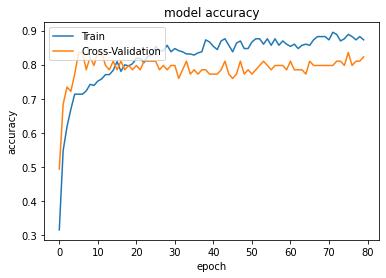

In [53]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()